In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
data=files.upload()

Saving Jamboree_Admission.csv to Jamboree_Admission.csv


In [ ]:
df=pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop('Serial No.',inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df.shape

(500, 8)

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Insights

There are 500 rows and 9 columns in the data set. But serial no. column is deleted because it is unique row identifier.

There are no missing values or duplicates presnt in the data.

The minimum and maximum score in GRE are 290 and 340 with the average score of 316.47.

Similarly minimum and maximum score in TOFL are 90 and 120 with average score of 107.19



In [ ]:
df.nunique()

,0
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [ ]:
df['University Rating'].value_counts(ascending=False)

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


In [ ]:
df['Research'].value_counts(ascending=False)

,count
Research,
1,280
0,220


In [ ]:
df['SOP'].value_counts(ascending=False)

,count
SOP,
4.0,89
3.5,88
3.0,80
2.5,64
4.5,63
2.0,43
5.0,42
1.5,25
1.0,6


In [ ]:
df['LOR '].value_counts(ascending=False)

,count
LOR,
3.0,99
4.0,94
3.5,86
4.5,63
2.5,50
5.0,50
2.0,46
1.5,11
1.0,1


All the columns are in numeric and continuous format, therefore no need to convert them it to category before applying linear regression.

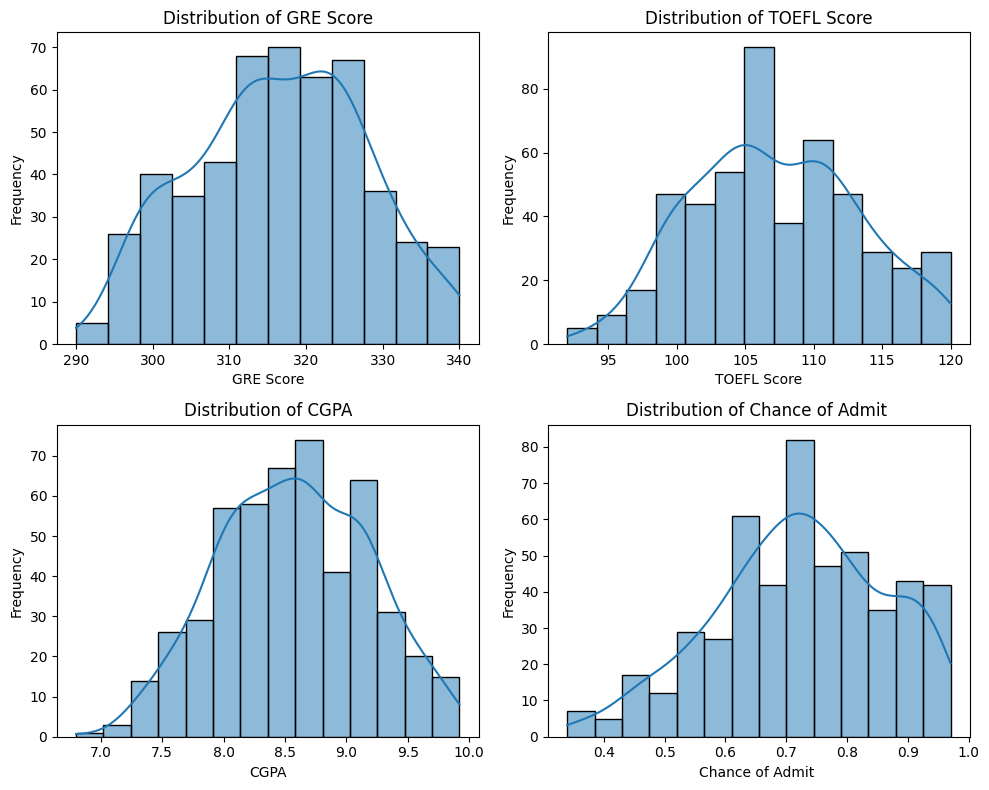

In [ ]:
#Univariate analysis distribution plot for continuous variables
numeric_columns=['GRE Score','TOEFL Score','CGPA','Chance of Admit ']
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
axes=axes.flatten()

for i, col in enumerate(numeric_columns):
  sns.histplot(df[col],kde=True,ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**Insights**

*   **GRE Score:** The distribution is roughly normal, centered around the mean GRE score.
*   **TOEFL Score:** Similar to GRE Score, the TOEFL score distribution is also approximately normal.
*   **CGPA:** The CGPA distribution is left-skewed, indicating that a significant number of applicants have high CGPA scores.
*   **Chance of Admit:** The distribution for the chance of admit is also left-skewed, suggesting that a larger number of applicants have a higher chance of admission.

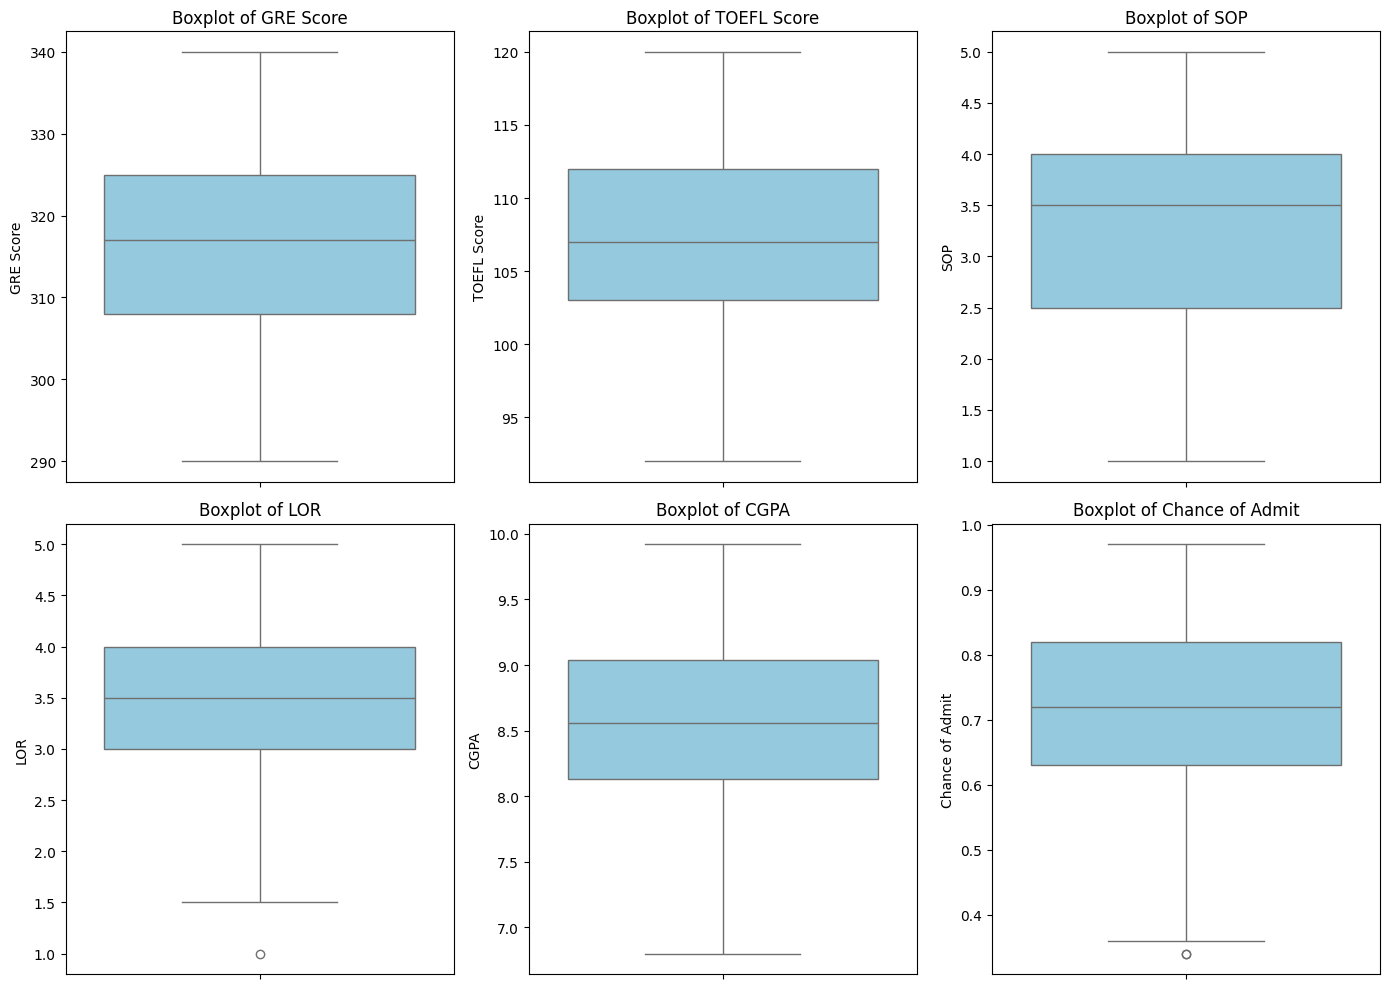

In [ ]:
#Outlier detection
df.columns = df.columns.str.strip()
numeric_cols = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


**Insights**

Outliers are minimal, mostly in LOR and Chance of Admit.

Most variables are fairly well-distributed, indicating a clean and usable dataset for modeling.

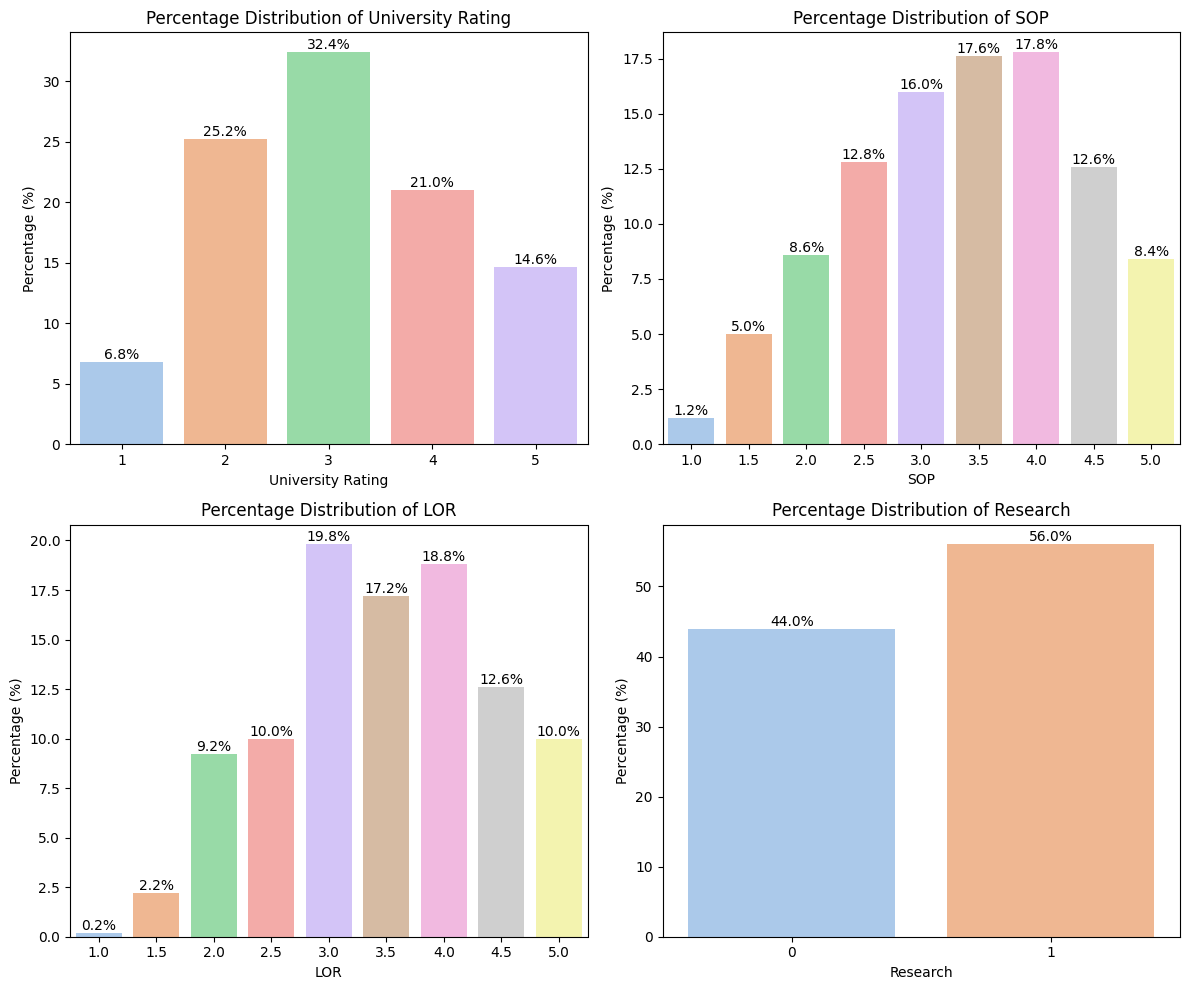

In [ ]:
# plots for categorical features
df.columns = df.columns.str.strip()

# Categorical columns (updated)
cat_columns = ['University Rating', 'SOP', 'LOR', 'Research']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    # Calculate percentage distribution
    percent_df = df[col].value_counts(normalize=True).reset_index()
    percent_df.columns = [col, 'Percentage']
    percent_df['Percentage'] *= 100

    # Plot
    bars = sns.barplot(data=percent_df, x=col, y='Percentage', ax=axes[i], palette='pastel')
    axes[i].set_title(f'Percentage Distribution of {col}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xlabel(col)

    # Add percentage labels
    for container in bars.containers:
        bars.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

**Insights**

*   **University Rating:** University ratings 2, 3, and 4 are the most common among applicants, with rating 3 being the most frequent.
*   **SOP:** SOP scores of 3.0, 3.5, and 4.0 are the most prevalent among applicants.
*   **LOR:** LOR scores of 3.0, 3.5, and 4.0 are the most common among applicants.
*   **Research:** A slightly larger percentage of applicants have research experience (56%) compared to those who do not (44%).

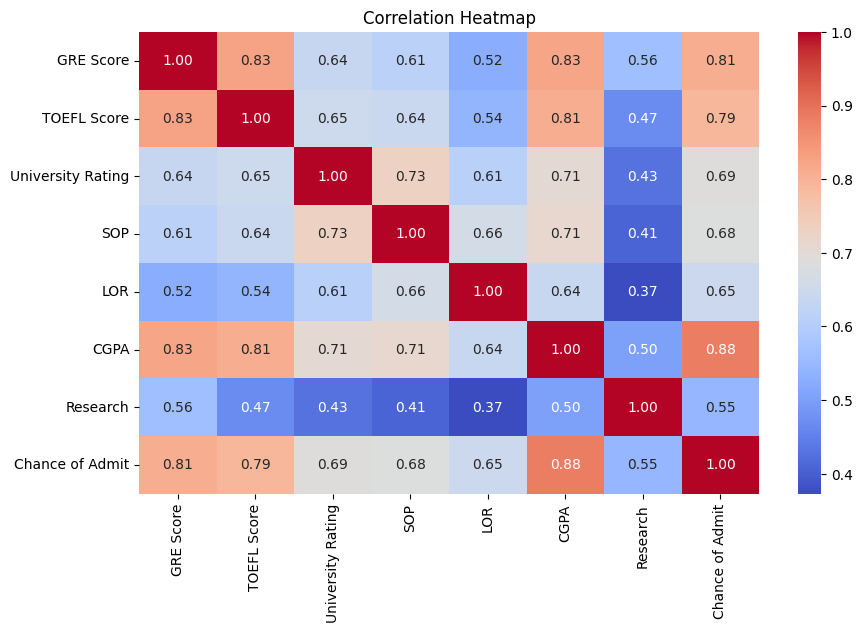

In [ ]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Insights**

*   Chance of Admit has the strongest positive correlation with (0.88), followed by GRE Score (0.81), TOEFL Score (0.79), University Rating (0.69), SOP (0.68),LOR (0.65), and Research (0.55). This suggests that a higher CGPA, GRE score, and TOEFL score are most strongly associated with a higher chance of admission.

*   University Rating has moderate to strong positive correlations with SOP (0.73), LOR (0.61), CGPA (0.71), GRE Score (0.64), and TOEFL Score (0.65). This implies that applicants applying to higher-rated universities tend to have stronger profiles across various metrics.

*   Research has a moderate positive correlation with Chance of Admit(0.55), suggesting that having research experience increases the likelihood of admission, although to a lesser extent compared to academic metrics like CGPA, GRE, and TOEFL scores.

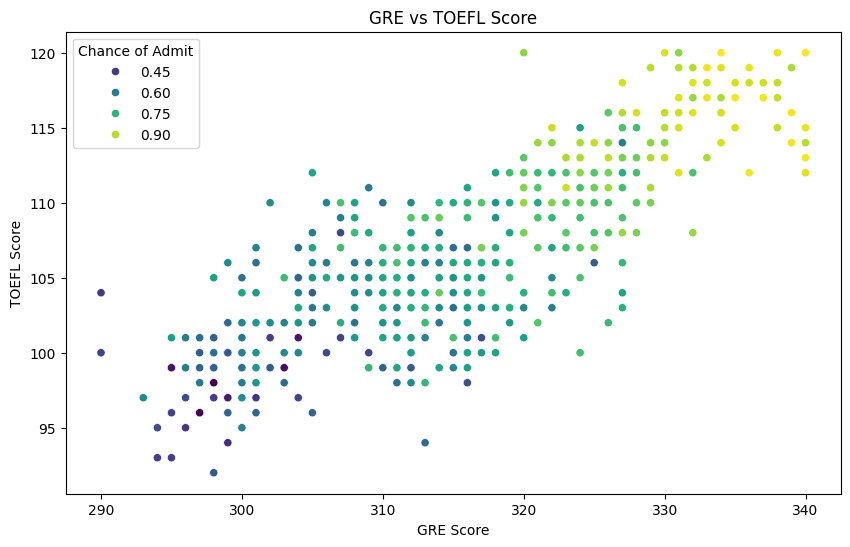

In [ ]:
# bivariate analysis for GRE and TOFEL score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GRE Score', y='TOEFL Score', hue='Chance of Admit', palette='viridis')
plt.title('GRE vs TOEFL Score')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.show()

**Insights**

*   The color gradient, representing the 'Chance of Admit', clearly shows a trend: applicants with higher GRE and TOEFL scores tend to have a higher chance of admission.

*   The plot visually reinforces the strong positive correlation between both GRE and TOEFL scores and the chance of admission.

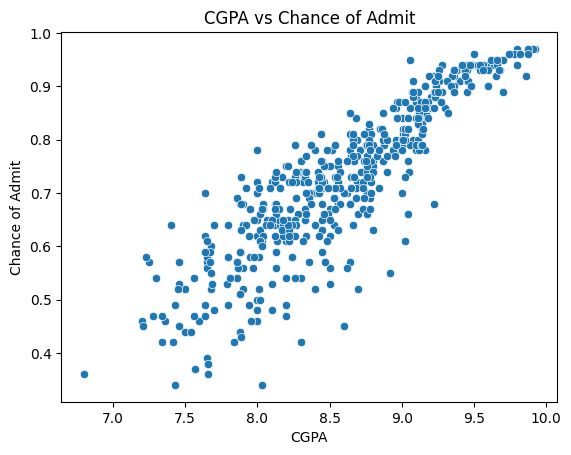

In [ ]:
#cgpa and chance of admit
sns.scatterplot(x='CGPA', y='Chance of Admit', data=df)
plt.title('CGPA vs Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

**Insights**

*   There is a strong positive linear relationship between CGPA and Chance of Admit. As CGPA increases, the Chance of Admit generally increases as well.

*   This plot visually confirms the strong positive correlation between CGPA and Chance of Admit that was observed in the correlation heatmap.

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#split the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

x=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
scaler=StandardScaler()

x_new = scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_new,columns=x_train.columns)
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [ ]:
x_new=scaler.transform(x_test)
x_test=pd.DataFrame(x_new,columns=x_test.columns)
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.576604,1.424271,0.775459,0.633979,0.021730,1.597217,0.895434
1,-0.248961,0.109306,0.775459,1.141162,0.564984,0.764683,0.895434
2,-0.157683,-0.383805,-0.972054,-1.394754,-1.064777,-1.549762,-1.116777
3,-0.431518,0.273677,-0.098298,-0.380387,-0.521524,0.181909,-1.116777
4,0.846378,0.766789,-0.098298,0.126796,-0.521524,0.781333,0.895434


In [ ]:
#ridge expression
from sklearn.linear_model import Ridge # Import Ridge

ridge=Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)
y_pred_ridge

array([0.91421984, 0.79500523, 0.57312558, 0.70715887, 0.81563898,
       0.86193529, 0.47458935, 0.64834145, 0.82326153, 0.8073473 ,
       0.7219803 , 0.72573285, 0.65682446, 0.93674345, 0.82368283,
       0.5096502 , 0.83944997, 0.59716395, 0.53330335, 0.5718811 ,
       0.66556695, 0.55341577, 0.72227494, 0.79505875, 0.780281  ,
       0.60245293, 0.94828279, 0.84741333, 0.62784767, 0.74358208,
       0.5556498 , 0.72981698, 0.54499176, 0.86094886, 0.65754431,
       0.73720042, 0.55395039, 0.95704805, 0.64387052, 0.71060898,
       0.9700221 , 0.57506196, 0.67056011, 0.85832293, 0.94084723,
       0.57772058, 0.95811299, 0.839033  , 0.79605353, 0.92561199,
       0.88783125, 0.56381135, 0.70377322, 0.52690138, 0.95357319,
       0.5981566 , 0.95545667, 0.73908587, 0.66236998, 0.50159755,
       0.62910715, 0.68012345, 0.59875846, 0.5928312 , 0.440936  ,
       0.58938993, 0.86660807, 0.89774293, 0.65814732, 0.70635182,
       0.61772125, 0.78588096, 0.69113132, 0.56317936, 0.55388

In [ ]:
y_test_pred = ridge.predict(x_test)
print("Test R2:", r2_score(y_test, y_test_pred))

Test R2: 0.8187885396675396


In [ ]:
# Find the index of the maximum predicted value
max_index = np.argmax(y_pred_ridge)

# Get the maximum predicted value
max_value = y_pred_ridge[max_index]

# Print the maximum predicted value and its index
print(f"Maximum predicted value: {max_value} at index {max_index}")

Maximum predicted value: 0.9700220998929274 at index 40


In [ ]:
lasso = Lasso(alpha=0.1)  # tune alpha as needed
lasso.fit(x_train, y_train)

y_test_pred = lasso.predict(x_test)
y_test_pred

array([0.76135121, 0.74197346, 0.68810332, 0.72840904, 0.74236102,
       0.74933701, 0.68461532, 0.71988283, 0.74894945, 0.73499747,
       0.72492104, 0.73112192, 0.70244285, 0.75786322, 0.74894945,
       0.69391664, 0.74119835, 0.70554329, 0.69624197, 0.68887843,
       0.7063184 , 0.6943042 , 0.72647126, 0.73150948, 0.7295717 ,
       0.70670596, 0.76212632, 0.74584901, 0.7063184 , 0.72685882,
       0.69701708, 0.73228459, 0.69352909, 0.74933701, 0.70166774,
       0.72259571, 0.70244285, 0.76522676, 0.7063184 , 0.72104549,
       0.76910231, 0.69701708, 0.71484461, 0.74468635, 0.76367654,
       0.71019395, 0.76561432, 0.74042324, 0.73073437, 0.75980099,
       0.75786322, 0.69701708, 0.72685882, 0.68461532, 0.76096366,
       0.69004109, 0.77142764, 0.73267214, 0.72259571, 0.68384021,
       0.71910772, 0.71561972, 0.70864373, 0.6985673 , 0.67686422,
       0.69004109, 0.75011212, 0.75204989, 0.71600728, 0.72685882,
       0.70399307, 0.73112192, 0.72569615, 0.68810332, 0.70205

In [ ]:
y_test_pred = lasso.predict(x_test)
print("Test R2:", r2_score(y_test, y_test_pred))

Test R2: 0.2670451559406176


In [ ]:
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x_train,y_train)
y_pred_elastic=elastic_net.predict(x_test)
y_pred_elastic

array([0.84202878, 0.76108856, 0.63740165, 0.72766351, 0.78340236,
       0.80331912, 0.58710072, 0.68899165, 0.78394822, 0.75724264,
       0.73609104, 0.7400825 , 0.67967538, 0.84268533, 0.79396775,
       0.61560752, 0.78729202, 0.64840518, 0.62680951, 0.60842077,
       0.66661145, 0.61943646, 0.71681868, 0.75806468, 0.7557176 ,
       0.65608924, 0.84036148, 0.7930963 , 0.67438243, 0.72273068,
       0.63168996, 0.74809753, 0.63356975, 0.79538266, 0.66927251,
       0.72455809, 0.6420113 , 0.84916939, 0.65659192, 0.71410283,
       0.86699146, 0.63046673, 0.68954345, 0.79096709, 0.85528141,
       0.66198043, 0.85782639, 0.77983206, 0.75420955, 0.82915949,
       0.81037819, 0.62944141, 0.70735421, 0.60141945, 0.84563985,
       0.64821406, 0.87283651, 0.74742936, 0.68983691, 0.59118205,
       0.6823591 , 0.68804163, 0.66673617, 0.64283957, 0.57073643,
       0.6314813 , 0.79870891, 0.81160439, 0.69273041, 0.7313615 ,
       0.65160671, 0.75631881, 0.72834002, 0.62496809, 0.64181

In [ ]:
elastic_net = ElasticNet(alpha=0.1)  # tune alpha as needed
elastic_net.fit(x_train, y_train)

y_test_pred = elastic_net.predict(x_test)
print("Test R2:", r2_score(y_test, y_test_pred))

Test R2: 0.6648594554304008


Ridge (R² ≈ 0.81): Performs best here. Ridge is great when you expect many features to have small/medium effects and want to keep them all but shrink coefficients to avoid overfitting.

Lasso (R² ≈ 0.63): Lower performance suggests strong feature selection (zeroing out some coefficients) might be removing important predictors in this dataset.

ElasticNet (R² ≈ 0.64): Combines Ridge + Lasso, but here it behaves closer to Lasso, still lower than Ridge, probably due to the balance between penalties.

So, Ridge linear expression is used to for further model prediction.

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(model.coef_,model.intercept_)

[0.02667052 0.01822633 0.00293995 0.001788   0.0158655  0.06758106
 0.01194049] 0.7241749999999999


In [ ]:
y_test.head(10)

,Chance of Admit
361,0.93
73,0.84
374,0.39
155,0.77
104,0.74
394,0.89
377,0.47
124,0.57
68,0.68
450,0.82


In [ ]:
y_pred=model.predict(x_test)
y_pred[:10]

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498])

In [ ]:
print(f'R2 score for train data is{model.score(x_train,y_train)}')
print(f'R2 score for test data is {model.score(x_test,y_test)}')

print(f"Mean absoulute error is {mean_absolute_error(y_test,y_pred)}")
print(f'Mean squared error is {mean_squared_error(y_test,y_pred)}')
print(f'Root mean squared error is {np.sqrt(mean_squared_error(y_test,y_pred))}')

R2 score for train data is0.8210671369321554
R2 score for test data is 0.8188432567829627
Mean absoulute error is 0.0427226542770537
Mean squared error is 0.0037046553987884136
Root mean squared error is 0.06086588041578314


In [ ]:
n,d=x_test.shape
n,d

(100, 7)

In [ ]:
#adjusted r2
r2=model.score(x_train,y_train)
adj_r2=1-((1-r2) * (n-1) / (n-d-1))
print(adj_r2)

0.807452679959602


**Insights**

The model is performing consistently well on both training and test data.

The error is low, and the high R²/adjusted R² scores suggest that the model fits the data well without overfitting.

**Assumptions for linear regression**

In [ ]:
#checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

x=df[["GRE Score","TOEFL Score",'University Rating','SOP','LOR',"Research"]]

X_const = sm.add_constant(x)
vif=pd.DataFrame()
vif['Features']=X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

            Features          VIF
0              const  1485.481233
1          GRE Score     3.763604
2        TOEFL Score     3.594274
3  University Rating     2.567679
4                SOP     2.741195
5                LOR     1.944971
6           Research     1.493134


**Insights**

Since all the features have VIF score less than 5 , it has low multicollinearity.


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'GRE Score'),
  Text(1, 0, 'TOEFL Score'),
  Text(2, 0, 'University Rating'),
  Text(3, 0, 'SOP'),
  Text(4, 0, 'LOR'),
  Text(5, 0, 'CGPA'),
  Text(6, 0, 'Research')])

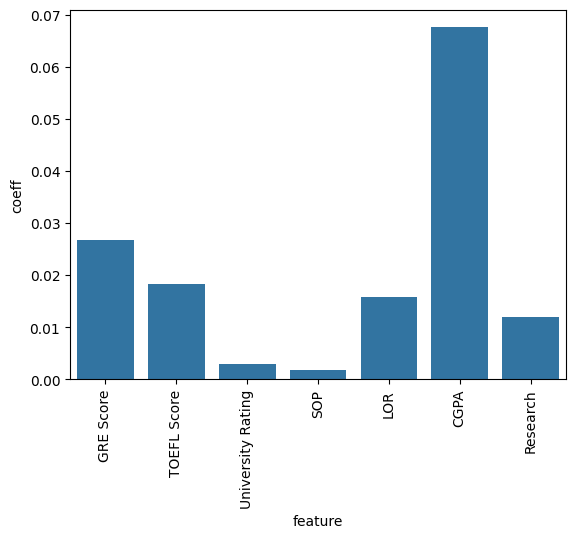

In [ ]:
#Feature importance
imp = pd.DataFrame(list(zip(x_train.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

CGPA is likely the most influential predictor (based on highest positive coefficient).

Mean residual: -0.005453623717661251
Residual standard deviation: 0.06092646161052157


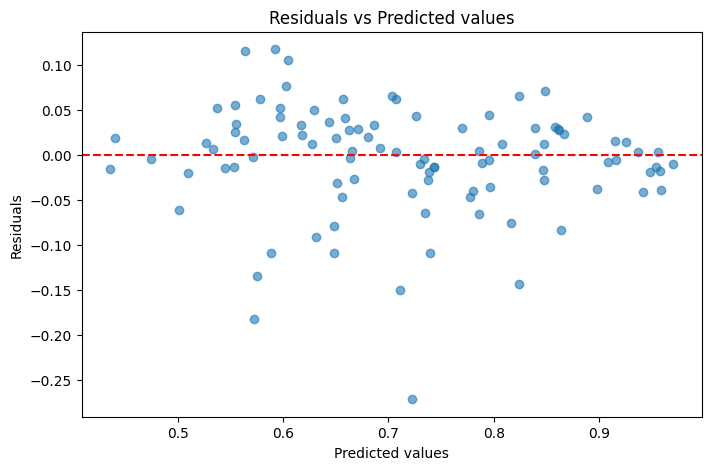

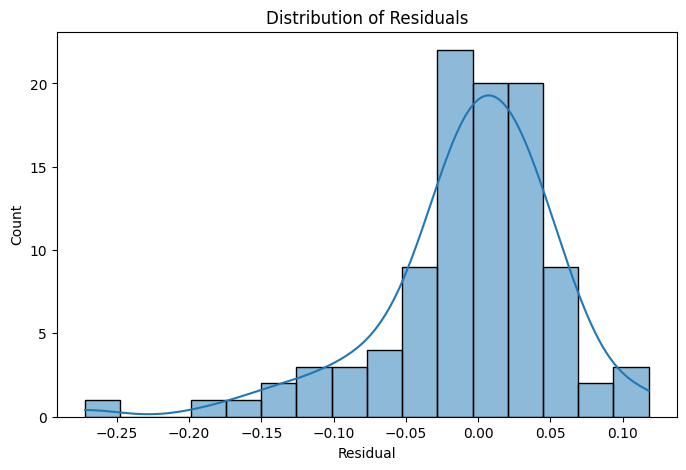

In [ ]:
# Residuals
residuals = y_test - y_pred

# Mean residual
print(f"Mean residual: {residuals.mean()}")

# Residual standard deviation
print(f"Residual standard deviation: {residuals.std()}")

# Residuals vs Predicted plot
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

# Residual distribution plot
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()

**Insights**

The mean residual (~ -0.00545) is very close to zero, indicating the model has minimal prediction bias.

The low RMSE (~0.0609) shows the model makes accurate predictions with small average errors.

Residuals are randomly scattered around zero with no visible pattern, confirming a good linear relationship between features and target.

The spread of residuals is relatively constant across predicted values, supporting the assumption of homoscedasticity (constant variance).

The distribution of residuals is roughly normal (bell-shaped), validating the assumption of normally distributed errors.

These results suggest the model generalizes well to new data without major violations of linear regression assumptions.

Minor deviations in residual spread suggest potential for improvement through feature engineering or transformations.

Overall, the model is reliable for prediction and decision-making within the current data range.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

x_test = pd.DataFrame(x_test, columns=x.columns)
y_test_reset = y_test.reset_index(drop=True)

# Add constant term for statsmodels using the scaled test DataFrame
X_sm = sm.add_constant(x_test)

# Fit OLS model with statsmodels on the test set
model_sm = sm.OLS(y_test_reset, X_sm).fit()

# Get residuals and perform Breusch-Pagan test
# The Breusch-Pagan test checks for heteroscedasticity
bp_test = het_breuschpagan(model_sm.resid, model_sm.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': np.float64(7.569680152135749), 'LM-Test p-value': np.float64(0.27135406239299503), 'F-Statistic': np.float64(1.2693891198388536), 'F-Test p-value': np.float64(0.2790749974745274)}


**Insights**

LM-Test p-value = 0.2713 (and F-Test p-value = 0.2791)
Both are greater than 0.05, so you fail to reject the null hypothesis of homoscedasticity.

This show no significant evidence of heteroscedasticity — the variance of residuals is reasonably constant across predicted values, which satisfies the homoscedasticity assumption.



In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(model_sm.resid)
print(f'Shapiro-Wilk Test statistic={stat:.4f}, p-value={p_value:.4f}')

Shapiro-Wilk Test statistic=0.9421, p-value=0.0003


P value is less than 0.05, therefor we reject null  hypothesis. The data is not normally distributed.

## Recommendations

Based on the exploratory data analysis and the linear regression model, the following recommendations can be made to applicants aiming for a higher chance of admission:

1.  **Focus on Academic Performance:** The analysis clearly shows that CGPA, GRE Score, and TOEFL Score have the strongest positive correlations with the Chance of Admit. Therefore, applicants should prioritize achieving high scores in these areas.
2.  **Strengthen University Profile:** Applying to universities with higher ratings is associated with a higher chance of admission, as indicated by the positive correlation between University Rating and Chance of Admit, as well as the stronger profiles (higher GRE, TOEFL, CGPA, SOP, LOR) of applicants to higher-rated universities.
3.  **Highlight Research Experience:** While not as strongly correlated as academic metrics, having research experience still shows a moderate positive correlation with the Chance of Admit. Applicants with research experience should emphasize it in their applications.
4.  **Craft Strong SOPs and LORs:** SOP and LOR scores also show positive correlations with the Chance of Admit. Investing time in writing a compelling Statement of Purpose and securing strong Letters of Recommendation can positively impact the application.
5.  **Consider Holistic Improvement:** Since multiple factors contribute to the Chance of Admit, a holistic approach to improving one's profile across all relevant metrics (academic scores, research, SOP, LOR, and targeting appropriate university ratings) is likely to be most effective.